In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

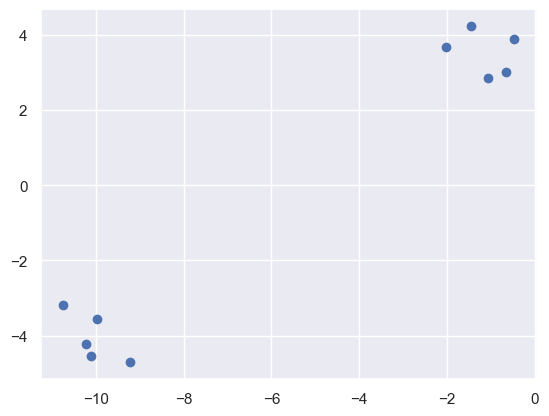

In [18]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=10, centers=2, cluster_std=0.68, random_state=1)

plt.scatter(x[:, 0], x[:, 1])


In [19]:
test = np.array([-8, -6])

In [20]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

euclidean(test, np.array([-7, -7]))

1.4142135623730951

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

/Users/testtwo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


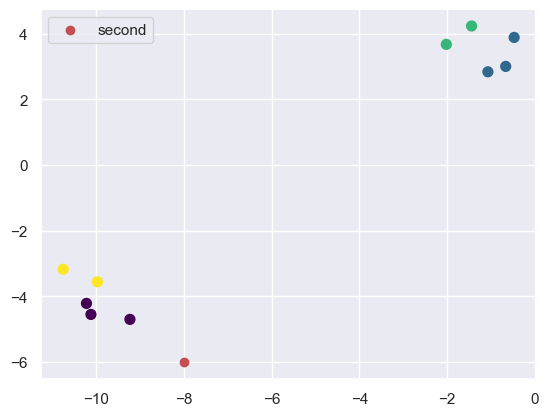

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax1.scatter(test[0], test[1], c='r', marker="o", label='second')
plt.legend(loc='upper left')
plt.show()

In [23]:
y_kmeans

array([0, 3, 3, 0, 1, 1, 2, 0, 2, 1], dtype=int32)

In [24]:
def find_neighbors(test, train, k):
    """
    test - new testing point, to be classified
    train - already classified training data
    k - k nearest neighbors
    """
    pass